In [37]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

In [1]:
with open('day3.dat', 'r') as f:
    data = f.readlines()


In [2]:
data

['#1 @ 509,796: 18x15\n',
 '#2 @ 724,606: 23x15\n',
 '#3 @ 797,105: 10x13\n',
 '#4 @ 925,483: 18x19\n',
 '#5 @ 450,349: 20x26\n',
 '#6 @ 71,733: 17x14\n',
 '#7 @ 647,787: 26x19\n',
 '#8 @ 893,66: 13x21\n',
 '#9 @ 824,532: 15x20\n',
 '#10 @ 247,335: 14x19\n',
 '#11 @ 714,795: 23x26\n',
 '#12 @ 218,265: 16x17\n',
 '#13 @ 605,708: 12x24\n',
 '#14 @ 835,294: 10x15\n',
 '#15 @ 646,944: 6x13\n',
 '#16 @ 96,568: 14x13\n',
 '#17 @ 539,101: 29x23\n',
 '#18 @ 738,320: 27x21\n',
 '#19 @ 290,47: 11x27\n',
 '#20 @ 808,149: 10x11\n',
 '#21 @ 942,793: 11x15\n',
 '#22 @ 763,745: 24x21\n',
 '#23 @ 491,738: 26x11\n',
 '#24 @ 594,414: 17x18\n',
 '#25 @ 542,825: 22x19\n',
 '#26 @ 480,951: 5x3\n',
 '#27 @ 75,845: 20x20\n',
 '#28 @ 619,64: 14x26\n',
 '#29 @ 193,463: 25x24\n',
 '#30 @ 220,74: 27x28\n',
 '#31 @ 710,374: 22x21\n',
 '#32 @ 534,449: 12x18\n',
 '#33 @ 116,741: 14x26\n',
 '#34 @ 801,574: 20x11\n',
 '#35 @ 929,134: 28x29\n',
 '#36 @ 515,771: 29x20\n',
 '#37 @ 861,409: 10x29\n',
 '#38 @ 99,503: 17x1

In [29]:
Measurement = namedtuple('Measurement', ['id', 'start_height', 'start_width', 'height', 'width'])

def process_line(line):
    line = line.strip()
    id_, rest = line.split('@')
    pos, size = rest.split(':')
    start_w, start_h = pos.split(',')
    w, h = size.split('x')
    return Measurement(id_.strip(), int(start_h), int(start_w), int(h), int(w))

processed = [process_line(line) for line in data]

In [30]:
processed

[Measurement(id='#1', start_height=796, start_width=509, height=15, width=18),
 Measurement(id='#2', start_height=606, start_width=724, height=15, width=23),
 Measurement(id='#3', start_height=105, start_width=797, height=13, width=10),
 Measurement(id='#4', start_height=483, start_width=925, height=19, width=18),
 Measurement(id='#5', start_height=349, start_width=450, height=26, width=20),
 Measurement(id='#6', start_height=733, start_width=71, height=14, width=17),
 Measurement(id='#7', start_height=787, start_width=647, height=19, width=26),
 Measurement(id='#8', start_height=66, start_width=893, height=21, width=13),
 Measurement(id='#9', start_height=532, start_width=824, height=20, width=15),
 Measurement(id='#10', start_height=335, start_width=247, height=19, width=14),
 Measurement(id='#11', start_height=795, start_width=714, height=26, width=23),
 Measurement(id='#12', start_height=265, start_width=218, height=17, width=16),
 Measurement(id='#13', start_height=708, start_widt

In [32]:
def add_patch(fabric, measurement):
    start_width = measurement.start_width
    start_height = measurement.start_height
    width = measurement.width
    height = measurement.height
    fabric[start_height:start_height + height, start_width:start_width+width] += 1
    return fabric

In [45]:
def add_patches(fabric, data):
    for measure in data:
        fabric = add_patch(fabric, measure)
    return fabric

fabric = add_patches(np.zeros((1000, 1000)), processed)
fabric
overlap = np.int32(fabric >= 2)
print(np.sum(overlap))

121259


In [52]:
def test_patch(fabric, measurement):
    start_width = measurement.start_width
    start_height = measurement.start_height
    width = measurement.width
    height = measurement.height
    patch = fabric[start_height:start_height + height, start_width:start_width+width]
    return np.all(patch)

In [56]:
for m in processed:
    if test_patch(no_overlap, m):
        print(m.id)

#239


In [55]:
test_patch(test, m)

True

In [48]:
no_overlap = np.int32(fabric == 1)

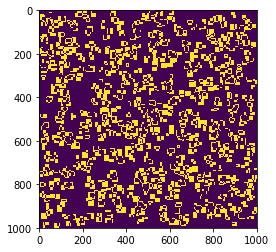

In [49]:
plt.imshow(no_overlap)

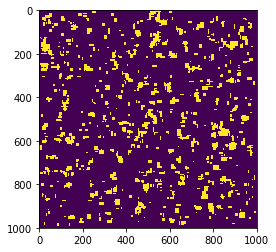

In [42]:
plt.imshow(np.int64(fabric >= 2))

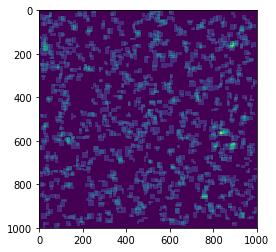

In [38]:
plt.imshow(fabric)

In [54]:
m = Measurement('#1', 2, 4, 2, 2)
fabric_test = np.zeros((10, 10))
test = add_patch(fabric_test, m)

In [13]:
fabric = np.zeros((1000, 1000))
fabric

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
fabric_test = np.zeros((10, 10))
width_start = 1
height_start = 3
width = 4
height = 3
fabric_test[height_start:height_start + height, width_start:width_start+width] += 1
fabric_test

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])